Sivakorn Srichaiyaperk 6410412012   PrivateRank20

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [4]:
df_test = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


In [5]:
# Your work
# Must have
# 1. Cleansing data
# 2. Exploratory Data Analysis (describe insight and visualization)
# 3. Training data - Crossvalidation
# 4. Testing data

## Cleansing data

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2500 non-null   float64
 1   x2      2500 non-null   float64
 2   x3      2500 non-null   float64
 3   x4      2500 non-null   float64
 4   x5      2500 non-null   float64
 5   x6      2500 non-null   float64
 6   x7      2500 non-null   float64
 7   x8      2500 non-null   float64
 8   x9      2500 non-null   float64
 9   x10     2500 non-null   float64
 10  x11     2500 non-null   float64
 11  x12     2500 non-null   float64
 12  x13     2500 non-null   float64
 13  x14     2500 non-null   float64
 14  x15     2500 non-null   float64
 15  x16     2500 non-null   float64
 16  x17     2500 non-null   float64
 17  x18     2500 non-null   float64
 18  x19     2500 non-null   float64
 19  x20     2500 non-null   float64
dtypes: float64(20)
memory usage: 390.8 KB


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [8]:
df_train['x1'].mean()

-14.968355052714559

In [9]:
df_train['x1'].fillna(df_train['x1'].mean(), inplace = True)

In [10]:
df_train['x1'].isnull().sum()

0

In [11]:
df_train.iloc[:,0]

0      -10.731014
1      -11.357862
2      -19.008191
3      -16.849847
4      -11.518749
          ...    
7495   -22.976076
7496   -14.769648
7497   -11.506576
7498   -19.096762
7499   -11.215776
Name: x1, Length: 7500, dtype: float64

In [12]:
for j in range(0,21) :
    df_train.iloc[:, j].fillna(df_train.iloc[:, j].mean(), inplace = True)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7500 non-null   float64
 1   x2      7500 non-null   float64
 2   x3      7500 non-null   float64
 3   x4      7500 non-null   float64
 4   x5      7500 non-null   float64
 5   x6      7500 non-null   float64
 6   x7      7500 non-null   float64
 7   x8      7500 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7500 non-null   float64
 10  x11     7500 non-null   float64
 11  x12     7500 non-null   float64
 12  x13     7500 non-null   float64
 13  x14     7500 non-null   float64
 14  x15     7500 non-null   float64
 15  x16     7500 non-null   float64
 16  x17     7500 non-null   float64
 17  x18     7500 non-null   float64
 18  x19     7500 non-null   float64
 19  x20     7500 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [14]:
x_train = df_train.iloc[:,0:-1]
y_train = df_train.iloc[:, -1]

In [15]:
x_test = df_test.iloc[:,:]

## Scaling data

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [17]:
x_train = scaler.fit_transform(x_train)

In [18]:
x_test = scaler.fit_transform(x_test)

## Learning model

In [19]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter = 2500)
clf.fit(x_train,y_train)
print(clf.predict(x_train))

[0 0 1 ... 0 0 0]


In [20]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

nn_params = [{'activation': ['logistic'], 'solver': ['adam'],
             'hidden_layer_sizes': [(68,),(69,),(70,),(71,),(72,)], 'random_state' : [0], 'max_iter' : [2500], 
              'learning_rate' : ['constant'], 'alpha' : [0.0045], 'learning_rate_init': [0.0007]}]

model = GridSearchCV(clf, nn_params ,cv = 30 ,scoring='f1', n_jobs=-1, refit=True, verbose=1)
best_model = model.fit(x_train, y_train)

print(model.best_params_)

Fitting 30 folds for each of 5 candidates, totalling 150 fits
{'activation': 'logistic', 'alpha': 0.0045, 'hidden_layer_sizes': (68,), 'learning_rate': 'constant', 'learning_rate_init': 0.0007, 'max_iter': 2500, 'random_state': 0, 'solver': 'adam'}


## Model Evaluation

In [21]:
#easy evaluate
print(best_model.score(x_train, y_train))

0.9888594164456234


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


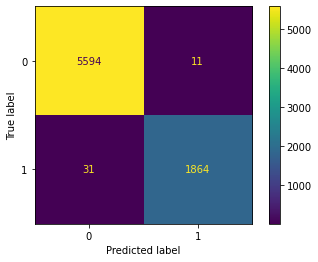

In [22]:
# confusion matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

plot_confusion_matrix(best_model, x_train, y_train)

plt.show()

## [TN,FP]
## [FP,TP]

In [23]:
# predict y_pred
y_pred = best_model.predict(x_train)

In [24]:
# precision recell f1score
from sklearn import metrics
from sklearn.metrics import accuracy_score
precision = metrics.precision_score(y_train, y_pred)
recall = metrics.recall_score(y_train, y_pred)
f1 = metrics.f1_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print("accuracy = ",accuracy )
print("precision = ",precision)
print("recall = ", recall)
print("f1 = ", f1)

accuracy =  0.9944
precision =  0.9941333333333333
recall =  0.9836411609498681
f1 =  0.9888594164456234


## Prediction

In [25]:
y_test = best_model.predict(x_test)

In [26]:
print(y_test)

[1 1 0 ... 0 1 0]


## Output

In [27]:
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']= y_test
df.to_csv('submit.csv', index=False)

In [28]:
''' output
predict = np.random.choice([0, 1], size=(2500,), p=[1./3, 2./3])
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(predict)
df.to_csv('submit.csv', index=False) '''

" output\npredict = np.random.choice([0, 1], size=(2500,), p=[1./3, 2./3])\nfields = ['id','Expected']\ndf = pd.DataFrame()\nid = list(range(1,2501))\ndf['id']=pd.Series(id)\ndf['Expected']=pd.Series(predict)\ndf.to_csv('submit.csv', index=False) "